# CLUSTERING

Clustering adalah teknik dalam analisis data yang digunakan untuk mengelompokkan objek atau data ke dalam kelompok-kelompok yang memiliki kesamaan tertentu. Tujuan utama dari clustering adalah untuk menemukan struktur tersembunyi dalam data tanpa adanya label kelas yang telah ditentukan sebelumnya. Dalam clustering, objek atau data yang memiliki kesamaan yang tinggi akan dikelompokkan bersama dalam sebuah kluster, sementara objek atau data yang berbeda secara signifikan akan ditempatkan dalam kluster yang berbeda. Tujuan dari clustering adalah mengelompokkan data untuk menemukan kelompok-kelompok yang saling berhubungan dalam data. Selain itu clustering juga digunakan untuk menangkap pola atau struktur yang mungkin tidak terlihat secara langsung dalam data.

Fungsi jarak dalam clustering digunakan untuk mengukur seberapa dekat atau seberapa jauh dua titik data dalam ruang fitur. Fungsi jarak memungkinkan kita untuk menentukan seberapa mirip atau berbedanya dua titik data, yang penting untuk proses pengelompokkan atau pengelompokkan data. Terdapat beberapa metode fungsi jarak yang digunakan dalam clustering, seperti: (1) Euclidean Distance; (2) Cosine Similarity; (3) Manhattan Distance; dsb

## K-means

K-Means adalah salah satu algoritma clustering yang paling populer dan sederhana. Ini adalah algoritma yang efisien dan efektif untuk mengelompokkan data ke dalam sejumlah kelompok (klaster) yang telah ditentukan sebelumnya. Algoritma ini bekerja dengan mencoba untuk mempartisi data menjadi kk kelompok yang berbeda, di mana setiap titik data termasuk dalam kelompok dengan mean terdekat (centroid). Langkah-langkah algoritma K-means adalah sebagai berikut:

1. Inisialisasi Centroid

   Pilih kk titik awal sebagai centroid awal, yang bisa dipilih secara acak.
2. Assignment Step

   Setiap titik data diatribusikan ke kelompok dengan centroid terdekat. Jarak biasanya diukur dengan Euclidean Distance.
3. Update Step

   Perbarui posisi centroid dari setiap kelompok dengan mean (rata-rata) dari semua titik data yang termasuk dalam kelompok tersebut.
4. Iterasi

   Langkah 2 dan 3 diulangi hingga tidak ada perubahan signifikan dalam posisi centroid atau hingga iterasi maksimum tercapai.
5. Output

   Keluaran dari algoritma adalah sejumlah kk klaster, di mana setiap klaster terdiri dari sejumlah titik data yang terdekat dengan centroidnya.

In [1]:
# Impor library yang diperlukan
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Memuat dataset iris
iris = load_iris()
X = iris.data  # Atribut-atribut dari setiap bunga

In [3]:
# Inisialisasi model K-Means dengan 3 klaster (karena dataset Iris memiliki 3 spesies bunga)
kmeans = KMeans(n_clusters=3)

In [4]:
# Latih model menggunakan data Iris
kmeans.fit(X)

c:\Users\Ariful\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [5]:
# Mendapatkan posisi centroid dari setiap klaster
centroids = kmeans.cluster_centers_

In [6]:
# Mendapatkan label klaster untuk setiap titik data
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

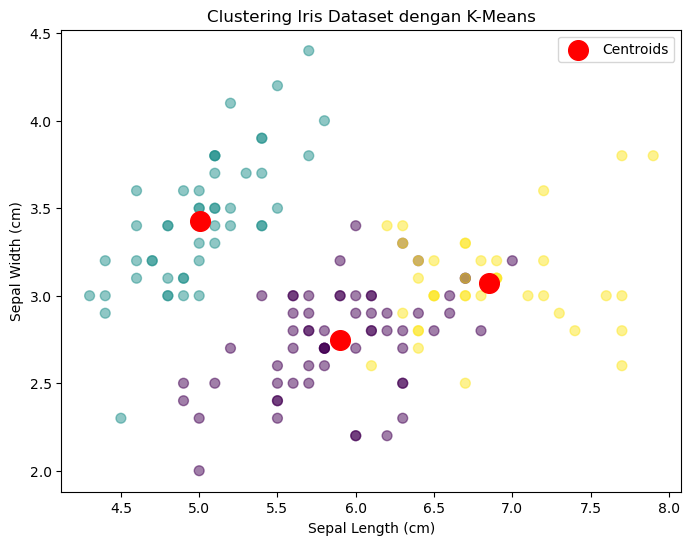

In [7]:
# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))

# Plot data untuk setiap atribut (sepal length vs sepal width)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=200, label='Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Clustering Iris Dataset dengan K-Means')
plt.legend()
plt.show()

Untuk mengukur kualitas cluster yang dihasilkan oleh algoritma clustering, kita dapat menggunakan beberapa metrik evaluasi yang tersedia. Dua metrik evaluasi yang umum digunakan adalah Inertia (Sum of Squared Errors) dan Silhouette Score.

Inertia mengukur seberapa padat atau terkonsentrasi klaster tersebut. Nilai inertia adalah jumlah kuadrat jarak antara setiap titik data dalam klaster dan pusat klusternya. Semakin kecil nilai inertia, semakin baik klaster tersebut. Namun, nilai inertia harus digunakan secara hati-hati karena cenderung menurun saat jumlah klaster meningkat.

Silhouette Score mengukur seberapa dekat setiap titik dalam sebuah klaster dengan titik dalam klaster yang sama dan seberapa jauh titik tersebut dari klaster lain. Rentang nilai Silhouette Score adalah -1 hingga 1.

- Nilai mendekati 1 menunjukkan bahwa titik tersebut ditempatkan dengan baik dalam klaster yang sesuai.
- Nilai mendekati 0 menunjukkan bahwa titik tersebut berada dekat dengan batas antara klaster.
- Nilai mendekati -1 menunjukkan bahwa titik tersebut mungkin telah ditempatkan dalam klaster yang salah.

Semakin tinggi nilai Silhouette Score, semakin baik kualitas klaster tersebut.

In [8]:
# Mendapatkan inertia (Sum of Squared Errors) dari model
inertia = kmeans.inertia_
print("Inertia (Sum of Squared Errors):", inertia)

# Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

Inertia (Sum of Squared Errors): 78.85144142614601
Silhouette Score: 0.5528190123564095


## Density-based spatial clustering of applications with noise (DBSCAN)

DBSCAN adalah algoritma clustering berbasis kepadatan yang mengelompokkan titik data berdasarkan kepadatan titik di sekitarnya. Algoritma ini dapat menemukan cluster dengan bentuk arbitrer dan secara otomatis mengidentifikasi titik-titik yang tidak termasuk dalam cluster manapun sebagai noise.

DBSCAN menggunakan dua parameter utama:

        eps (epsilon): Radius maksimum untuk mencari tetangga di sekitar sebuah titik.
        min_samples: Jumlah minimum titik yang harus ada dalam radius eps agar sebuah titik dianggap sebagai titik inti (core point).

Cara Kerja DBSCAN:

        Titik Inti (Core Point): Titik yang memiliki setidaknya min_samples titik (termasuk dirinya sendiri) dalam radius eps.
        Titik Border (Border Point): Titik yang berada dalam radius eps dari titik inti, tetapi jumlah tetangganya kurang dari min_samples.
        Titik Noise: Titik yang bukan titik inti maupun titik border, dianggap sebagai outlier.

Langkah-langkah DBSCAN:

        1. Mulai dari sebuah titik yang belum dikunjungi.
        2. Jika titik tersebut adalah titik inti, buat cluster baru dan tambahkan semua titik yang dapat dijangkau dari titik inti tersebut (baik titik inti lain maupun titik border).
        3. Lanjutkan ke titik berikutnya yang belum dikunjungi.
        4. Jika titik bukan titik inti dan bukan bagian dari cluster manapun, tandai sebagai noise.
        5. Proses ini berlanjut sampai semua titik telah dikunjungi.


In [9]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [10]:
# Load dataset Iris
iris = load_iris()
X = iris.data  # Semua fitur

In [11]:
# Normalisasi fitur sangat penting untuk DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Inisialisasi dan jalankan DBSCAN
# eps dan min_samples bisa disesuaikan untuk hasil terbaik
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

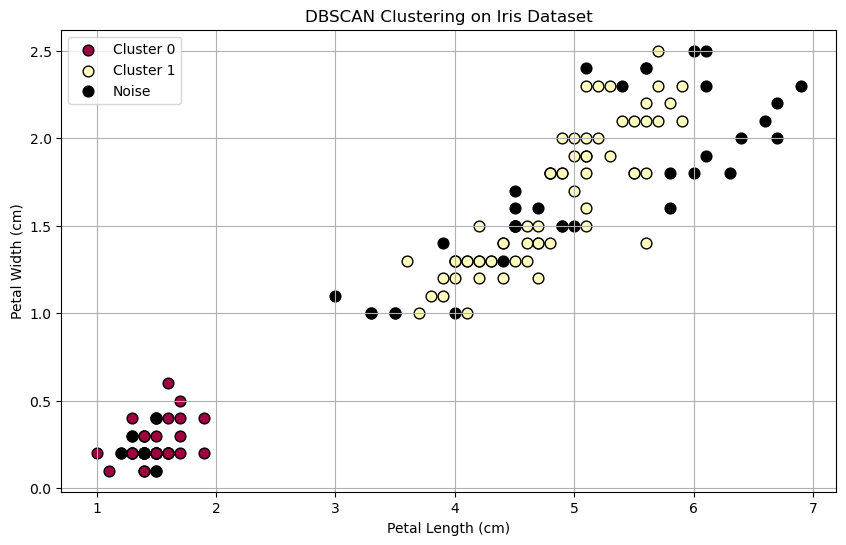

In [13]:
# Visualisasi hasil clustering menggunakan dua fitur: petal length dan petal width
plt.figure(figsize=(10, 6))
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise points diberi warna hitam
        col = [0, 0, 0, 1]

    class_member_mask = (clusters == k)
    xy = X[class_member_mask]

    plt.scatter(xy[:, 2], xy[:, 3], c=[col], label=f'Cluster {k}' if k != -1 else 'Noise', edgecolor='k', s=60)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('DBSCAN Clustering on Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Hitung Silhouette Score hanya jika ada lebih dari 1 cluster dan bukan semua noise
if len(set(clusters)) > 1 and len(set(clusters)) - (1 if -1 in clusters else 0) > 0:
    score = silhouette_score(X_scaled, clusters)
    print(f'Silhouette Score: {score:.4f}')
else:
    print('Silhouette Score tidak dapat dihitung karena jumlah cluster kurang dari 2 atau semua data adalah noise.')


Silhouette Score: 0.3565


In [15]:
# Hitung inertia score (sum of squared distances to cluster centroids) untuk cluster non-noise
unique_labels = set(clusters)
if -1 in unique_labels:
    unique_labels.remove(-1)  # hapus noise

if len(unique_labels) > 0:
    inertia = 0
    for label in unique_labels:
        cluster_points = X_scaled[clusters == label]
        centroid = cluster_points.mean(axis=0)
        sq_distances = np.sum((cluster_points - centroid) ** 2)
        inertia += sq_distances
    print(f'Inertia Score (sum of squared distances to centroids): {inertia:.4f}')
else:
    print('Inertia Score tidak dapat dihitung karena tidak ada cluster valid.')

Inertia Score (sum of squared distances to centroids): 95.0669
